# HOMEWORK PYTHON DSA
Description    :
<br> Author    : Wilvan Dany Aritonang
<br> Date      : 5 November 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv",encoding = 'latin1')

### EXPLORING DATA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.Name.nunique()

891

In [8]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
count_missing = df.isnull().sum()
missing  = count_missing[count_missing>0]
missing[missing >df.shape[0]*0.6]

Cabin    687
dtype: int64

In [12]:
df.Survived.value_counts()

#Survival 0=No, 1=Yes


0    549
1    342
Name: Survived, dtype: int64

## ANALYSIS
<BR> I will analyze from Column :
* PCLASS
* SEX
* AGE
* SIBSP
* PARCH
* EMBARKED

### PCLASS ANALYSIS

In [13]:
df.Pclass.value_counts()

### Pclass is the Ticket Class
### 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class
### The Ticket Class will define the deck position in Titanic

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    dt = pd.DataFrame([survived,dead])
    dt.index = ['Survived','Dead']
    dt.plot(kind='bar',stacked=False, figsize=(10,5))

In [15]:
def bar_chart1(feature2):
    firstclas = df[df['Pclass']==1][feature2].value_counts()
    secondclass = df[df['Pclass']==2][feature2].value_counts()
    thirdclass = df[df['Pclass']==3][feature2].value_counts()
    dt = pd.DataFrame([firstclas,secondclass,thirdclass])
    dt.index = ['1s','2nd','3rd']
    dt.plot(kind='bar',stacked=False, figsize=(10,5))

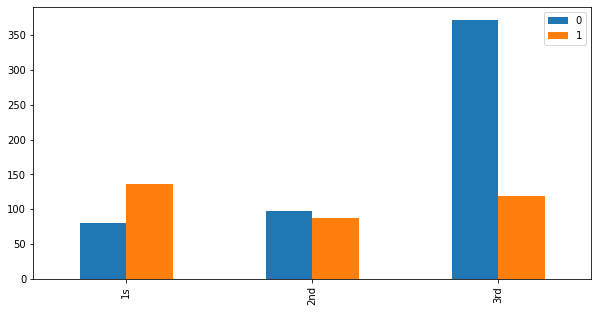

In [16]:
bar_chart1('Survived')

* From the chart show that mostly the passengers in fristclass is survived, otherwise mostly the passengers in thirdclass is dead
* In the secondclass,possibility to survived is equal

### AGE ANALYSIS

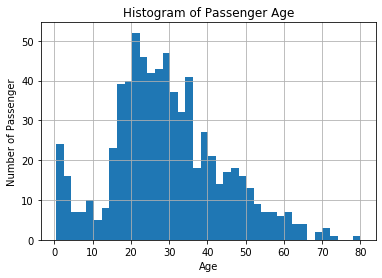

In [17]:
df.Age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Passenger")
plt.title("Histogram of Passenger Age");

In [18]:
df.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [19]:
df[(df.Survived == 1) & (df.Age == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


### SEX ANALYSIS

In [20]:
def bar_chart2(feature3):
    fml = df[df['Sex']=="female"][feature3].value_counts()
    ml = df[df['Sex']=="male"][feature3].value_counts()
    dt = pd.DataFrame([fml,ml])
    dt.index = ['Female','Male']
    dt.plot(kind='bar',stacked=False, figsize=(10,5))

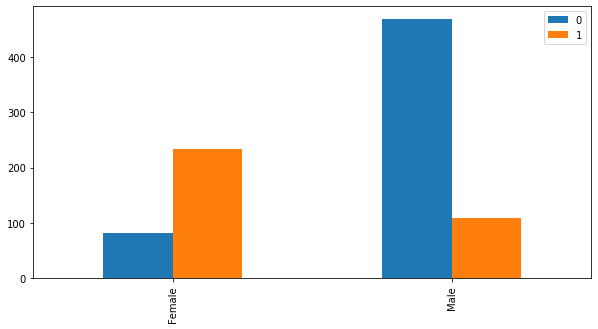

In [21]:
bar_chart2('Survived')

In [39]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

* The Chart show that Female more likely Survived than Male
* Otherwise Male more likely Dead than Female
<br>Why? Many reasons, for example :
* Lifeboat priority is only for a Females and Childrens

### SIBSP ANALYSIS

In [30]:
def bar_chart3(feature4):
    nonfam = df[df['SibSp']==0][feature4].value_counts()
    fam = df[df['SibSp']==1][feature4].value_counts()
    dt = pd.DataFrame([nonfam,fam])
    dt.index = ['Non Family','Family']
    dt.plot(kind='bar',stacked=False, figsize=(10,5))

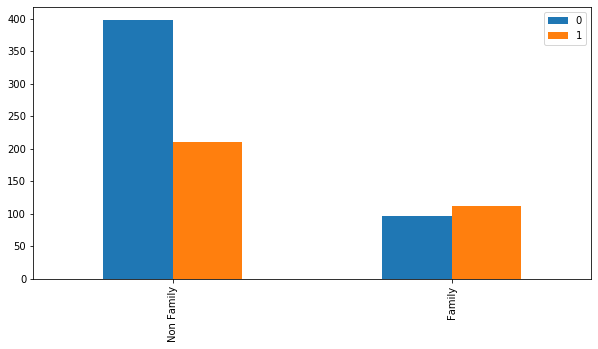

In [31]:
bar_chart3('Survived')

In [40]:
df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

### EMBARKED ANALYSIS

In [33]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [36]:
def bar_chart4(feature5):
    Cherbourg = df[df['Embarked']=="C"][feature5].value_counts()
    Queenstown = df[df['Embarked']=="Q"][feature5].value_counts()
    Southampton = df[df['Embarked']=="S"][feature5].value_counts()
    dt = pd.DataFrame([Cherbourg,Queenstown,Southampton])
    dt.index = ['Cherbourg','Queenstown','Southampton']
    dt.plot(kind='bar',stacked=False, figsize=(10,5))

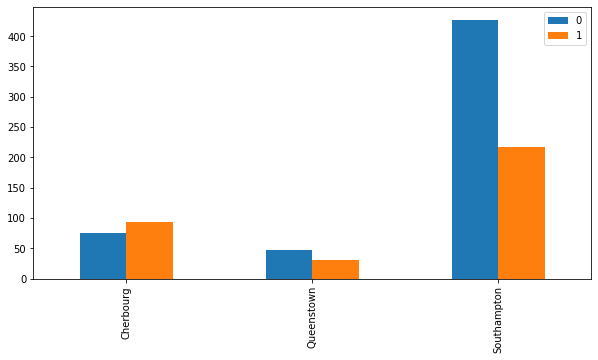

In [37]:
bar_chart4('Survived')

In [38]:
df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

* The Cherbourg has more possibility to survive
* Southampton as the first embarked is the biggest number of passengers Dead

# CONCLUSION

Based on observation of the data and Internet information, may passengers survived is based on:
* Passengers Female and under 28 yo
* Passengers in Upper Clas (1st Class and 2nd Class)
* Passengers that embarked from Cherbourg